In [288]:
import pandas as pd

# 假设文件名为data.txt，先读取数据
data = pd.read_csv('score.txt', header=None)

# 显示前几行数据查看格式
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,2023,125200,公共管理,专业型硕士,上海海洋大学,NaN,175,44,0,88,0,NaN
1,2023,095137,农业管理,专业型硕士,上海海洋大学,NaN,251,33,33,50,50,NaN
2,2023,095135,食品加工与安全,专业型硕士,上海海洋大学,NaN,251,33,33,50,50,NaN
3,2023,095134,渔业发展,专业型硕士,上海海洋大学,NaN,251,33,33,50,50,NaN
4,2023,086000,生物与医药,专业型硕士,上海海洋大学,NaN,273,38,38,57,57,NaN


In [289]:
# 为数据添加列名
columns = ['年份', '代码', '专业', '类型', '学校', 'NaN','国家线', '英语线', '政治线', '数学线', '专业线','NaN']
data.columns = columns

# 删除 'NaN' 列，因为没有实际意义
data = data.drop(columns=['NaN'])  # 删除 'NaN' 列（如果存在）

# 查看处理后的数据
data.head()


,年份,代码,专业,类型,学校,国家线,英语线,政治线,数学线,专业线
0,2023,125200,公共管理,专业型硕士,上海海洋大学,175,44,0,88,0
1,2023,095137,农业管理,专业型硕士,上海海洋大学,251,33,33,50,50
2,2023,095135,食品加工与安全,专业型硕士,上海海洋大学,251,33,33,50,50
3,2023,095134,渔业发展,专业型硕士,上海海洋大学,251,33,33,50,50
4,2023,086000,生物与医药,专业型硕士,上海海洋大学,273,38,38,57,57


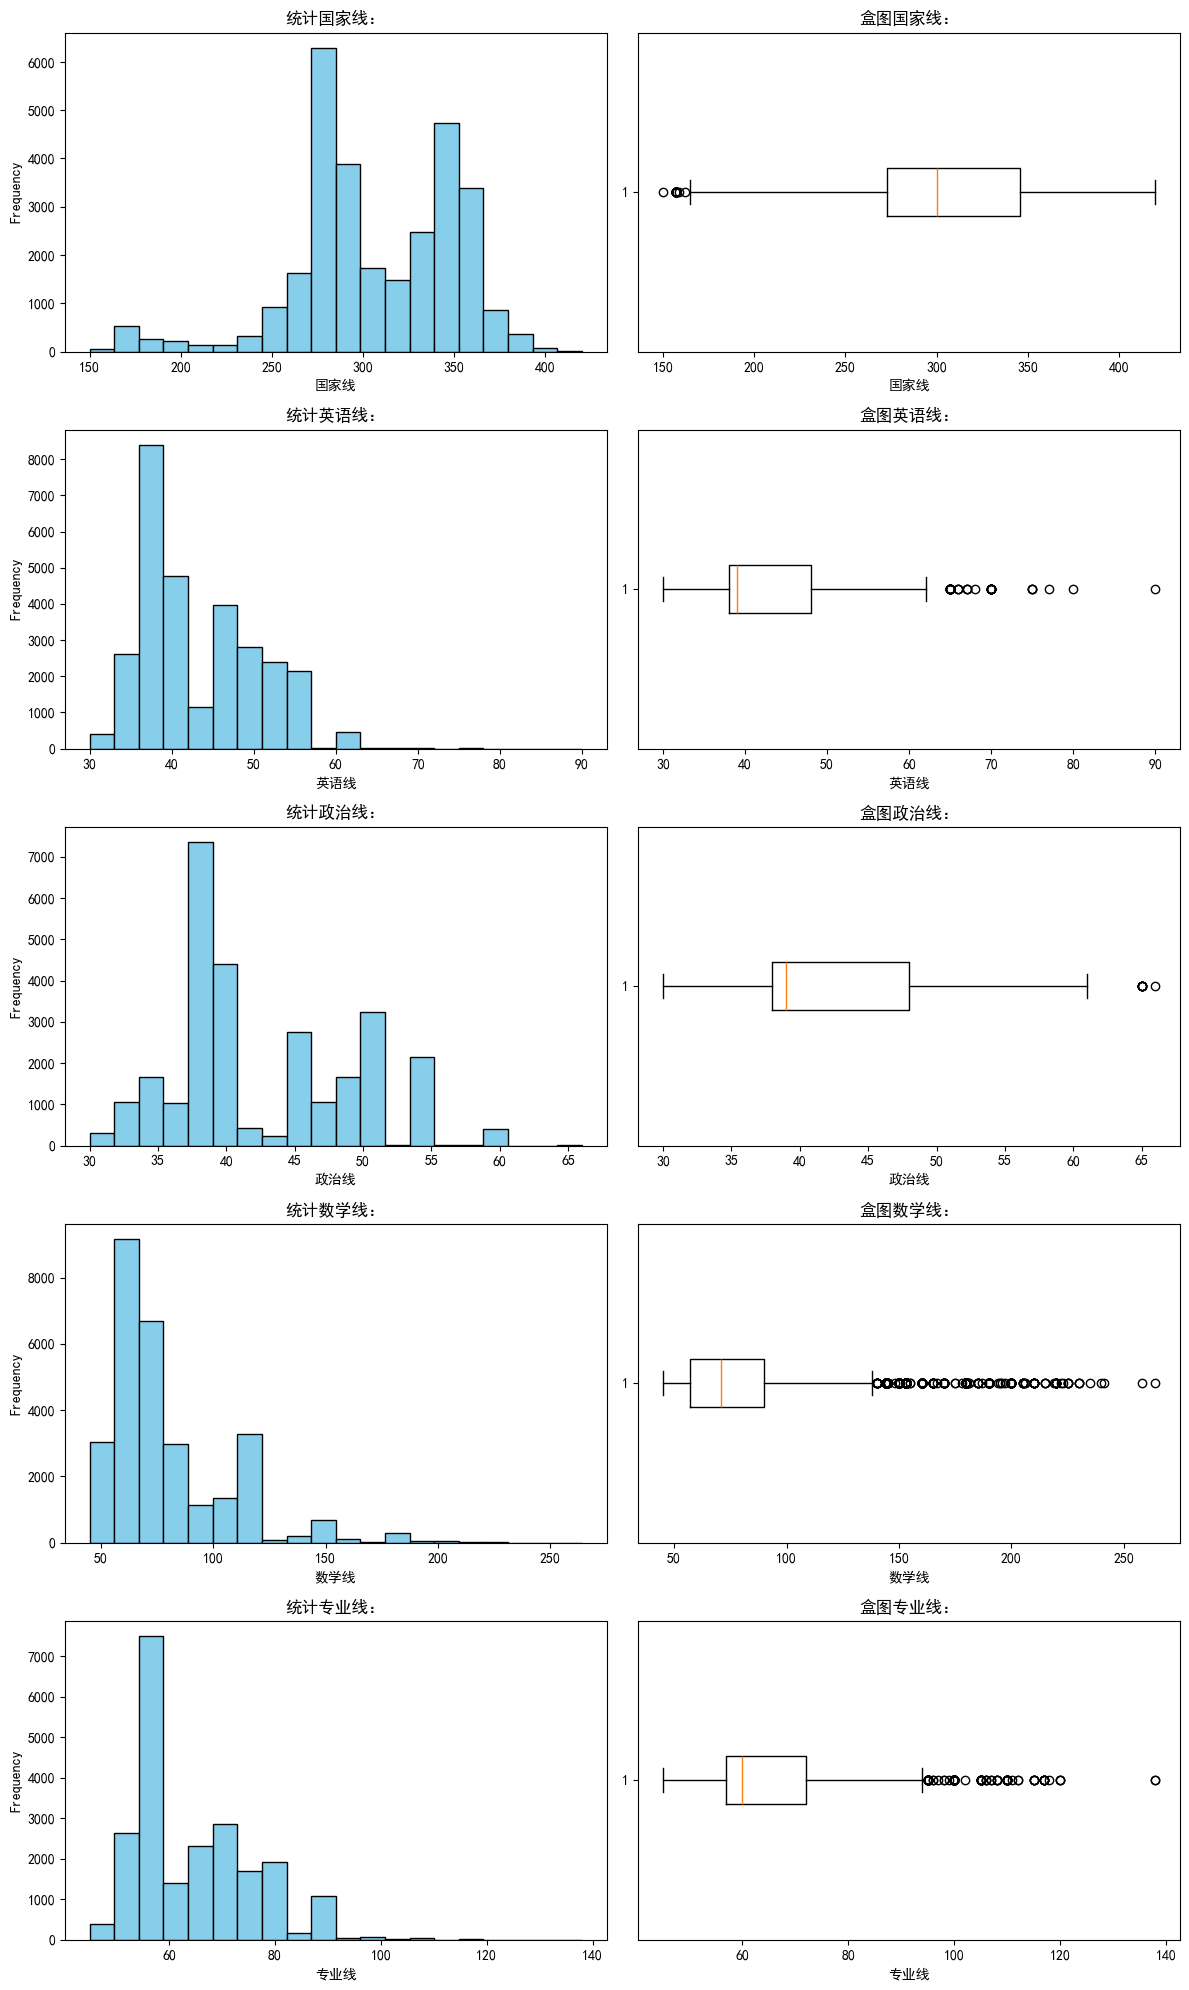

In [290]:
import matplotlib.pyplot as plt

# 列出要绘制的列名
score_columns = ['国家线', '英语线', '政治线', '数学线', '专业线']

# 设置子图的行列数
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# 遍历每个要绘制的列
for i, column in enumerate(score_columns):
    # 排除掉值为0的数据
    column_data = data[column].loc[data[column] != 0]
    
    # 绘制直方图
    axes[i, 0].hist(column_data, bins=20, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'统计{column}：')
    axes[i, 0].set_xlabel(f'{column}')
    axes[i, 0].set_ylabel('Frequency')
    
    # 绘制箱线图
    axes[i, 1].boxplot([column_data], vert=False)  # 将数据包装为列表
    axes[i, 1].set_title(f'盒图{column}：')
    axes[i, 1].set_xlabel(f'{column}')

# 调整布局，使得图形不重叠
plt.tight_layout()
plt.show()


In [291]:
import pandas as pd

# 假设数据集已经加载为 DataFrame `data`

# 1. 检查缺失值
print(data.isnull().sum())  # 查看每列的缺失值数目

# 2. 处理缺失值
# 2.1 如果某列缺失值超过50%，可以考虑删除该列
data = data.dropna(thresh=len(data)*0.5, axis=1)

# 2.2 对缺失值较少的列，可以填充缺失值（例如填充为均值）
data['国家线'] = data['国家线'].fillna(data['国家线'].mean())  # 使用均值填充
data['英语线'] = data['英语线'].fillna(data['英语线'].mean())  # 使用均值填充
data['政治线'] = data['政治线'].fillna(data['政治线'].mean())  # 使用均值填充
data['数学线'] = data['数学线'].fillna(data['数学线'].mean())  # 使用均值填充
data['专业线'] = data['专业线'].fillna(data['专业线'].mean())  # 使用均值填充

# 3. 删除重复值
data = data.drop_duplicates()  # 删除重复行

# 4. 检查数据类型并转换
# 确保所有列的数据类型是合理的，例如确保年和分数列为数值型
data['国家线'] = pd.to_numeric(data['国家线'], errors='coerce')  # 强制转换为数值型，无法转换的设置为NaN
data['英语线'] = pd.to_numeric(data['英语线'], errors='coerce')
data['政治线'] = pd.to_numeric(data['政治线'], errors='coerce')
data['数学线'] = pd.to_numeric(data['数学线'], errors='coerce')
data['专业线'] = pd.to_numeric(data['专业线'], errors='coerce')

# 6. 处理异常值（根据具体情况，你可以选择不同的处理方法）
# 例如，如果 "国家线" 小于0或者大于100，则可能是异常值
data = data[data['国家线'].between(0, 400)]  # 删除 "国家线" 超过 0 到 100 范围的异常值

# 7. 统一列名（去除多余的空格和特殊字符）
data.columns = data.columns.str.strip()  # 去除列名中的前后空格
data.columns = data.columns.str.replace(' ', '_')  # 用下划线替换空格

# 9. 查看清理后的数据
data.head()  # 查看清理后的前几行数据


年份     0
代码     0
专业     0
类型     0
学校     0
国家线    0
英语线    0
政治线    0
数学线    0
专业线    0
dtype: int64


,年份,代码,专业,类型,学校,国家线,英语线,政治线,数学线,专业线
0,2023,125200,公共管理,专业型硕士,上海海洋大学,175,44,0,88,0
1,2023,095137,农业管理,专业型硕士,上海海洋大学,251,33,33,50,50
2,2023,095135,食品加工与安全,专业型硕士,上海海洋大学,251,33,33,50,50
3,2023,095134,渔业发展,专业型硕士,上海海洋大学,251,33,33,50,50
4,2023,086000,生物与医药,专业型硕士,上海海洋大学,273,38,38,57,57


In [292]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 选择需要归约的特征（去除目标变量）
features = data[['英语线', '政治线', '数学线', '专业线']]

# 对数据进行标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 进行PCA降维
pca = PCA(n_components=1)  # 选择降到1维
reduced_data = pca.fit_transform(scaled_features)

# 将降维后的数据添加到原始数据中
data_pca = pd.DataFrame(reduced_data, columns=['PCA'])
data = pd.concat([data, data_pca], axis=1)

data.head()


,年份,代码,专业,类型,学校,国家线,英语线,政治线,数学线,专业线,PCA
0,2023.0,125200,公共管理,专业型硕士,上海海洋大学,175.0,44.0,0.0,88.0,0.0,-2.686874
1,2023.0,095137,农业管理,专业型硕士,上海海洋大学,251.0,33.0,33.0,50.0,50.0,-1.157919
2,2023.0,095135,食品加工与安全,专业型硕士,上海海洋大学,251.0,33.0,33.0,50.0,50.0,-1.157919
3,2023.0,095134,渔业发展,专业型硕士,上海海洋大学,251.0,33.0,33.0,50.0,50.0,-1.157919
4,2023.0,086000,生物与医药,专业型硕士,上海海洋大学,273.0,38.0,38.0,57.0,57.0,-0.381299


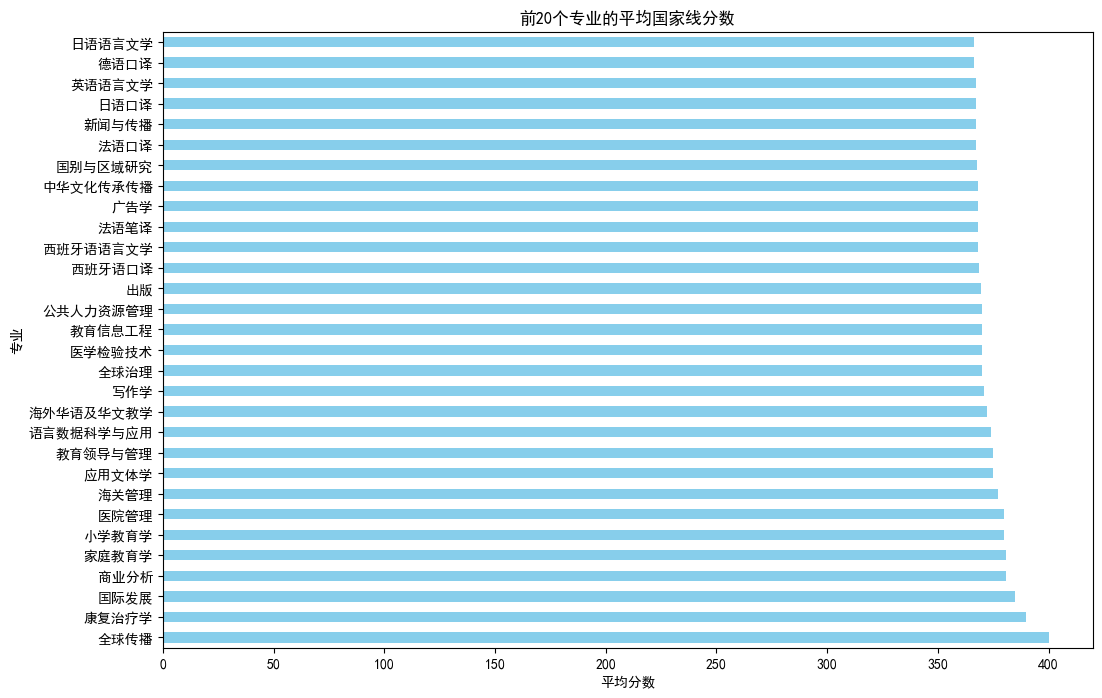

In [293]:
import matplotlib.pyplot as plt
import matplotlib

# 设置matplotlib使用SimHei字体，解决中文显示问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 按学科计算平均国家线分数
average_scores = data.groupby('专业')['国家线'].mean()

# 选取前20个专业
top_20_majors = average_scores.sort_values(ascending=False).head(30)

# 绘制柱状图
plt.figure(figsize=(12, 8))
top_20_majors.plot(kind='barh', color='skyblue')
plt.title('前20个专业的平均国家线分数')
plt.xlabel('平均分数')
plt.ylabel('专业')

# 设置y轴标签的字体大小并旋转
plt.yticks(fontsize=10, rotation=0)  # 设置字体大小为10，并旋转0度

plt.show()


In [294]:
# 计算每个学科的平均成绩
data['AverageScore'] = data[['国家线']].mean(axis=1)

# 按学科计算平均分
average_scores = data.groupby('专业')['AverageScore'].mean()

# 数据描述
description = data.describe()

# 打印数据描述结果
print(description)

# 打印按学科的平均分描述
print(average_scores.describe())


            年份           国家线           英语线           政治线           数学线  \
count  29513.0  29513.000000  29513.000000  29513.000000  29513.000000   
mean    2023.0    305.656694     42.132687     39.934605     77.330532   
std        0.0     45.141750      8.135343     11.960320     29.561097   
min     2023.0    150.000000      0.000000      0.000000      0.000000   
25%     2023.0    273.000000     38.000000     38.000000     57.000000   
50%     2023.0    300.000000     39.000000     39.000000     70.000000   
75%     2023.0    346.000000     48.000000     48.000000     88.000000   
max     2023.0    400.000000     90.000000     66.000000    264.000000   

                专业线           PCA  AverageScore  
count  29513.000000  29513.000000  29513.000000  
mean      48.922475      0.000000    305.656694  
std       29.990806      1.410056     45.141750  
min        0.000000     -6.361984    150.000000  
25%       45.000000     -0.843146    273.000000  
50%       57.000000     -0.381299

In [295]:
# 按学科计算平均分
average_scores = data.groupby('专业')['AverageScore'].mean()

# 查看学科的平均成绩描述
average_scores_description = average_scores.describe()
print(average_scores_description)


count    1560.000000
mean      305.312918
std        37.001575
min       180.956522
25%       273.000000
50%       296.000000
75%       340.000000
max       400.000000
Name: AverageScore, dtype: float64


In [296]:
# 假设data已经加载并且包含相关列
# 选择数据框中数值类型的列
numeric_columns = data.select_dtypes(include=['number']).columns

# 使用选中的数值列计算相关性矩阵
correlation_matrix = data[numeric_columns].corr()

# 打印相关性矩阵
correlation_matrix


,年份,国家线,英语线,政治线,数学线,专业线,PCA,AverageScore
年份,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
国家线,NaN,1.000000,0.480444,0.785406,0.180381,0.439245,0.107970,1.000000
英语线,NaN,0.480444,1.000000,0.571861,0.455257,0.346420,0.321034,0.480444
政治线,NaN,0.785406,0.571861,1.000000,0.214967,0.535587,0.204312,0.785406
数学线,NaN,0.180381,0.455257,0.214967,1.000000,-0.560250,0.117133,0.180381
专业线,NaN,0.439245,0.346420,0.535587,-0.560250,1.000000,0.163022,0.439245
PCA,NaN,0.107970,0.321034,0.204312,0.117133,0.163022,1.000000,0.107970
AverageScore,NaN,1.000000,0.480444,0.785406,0.180381,0.439245,0.107970,1.000000


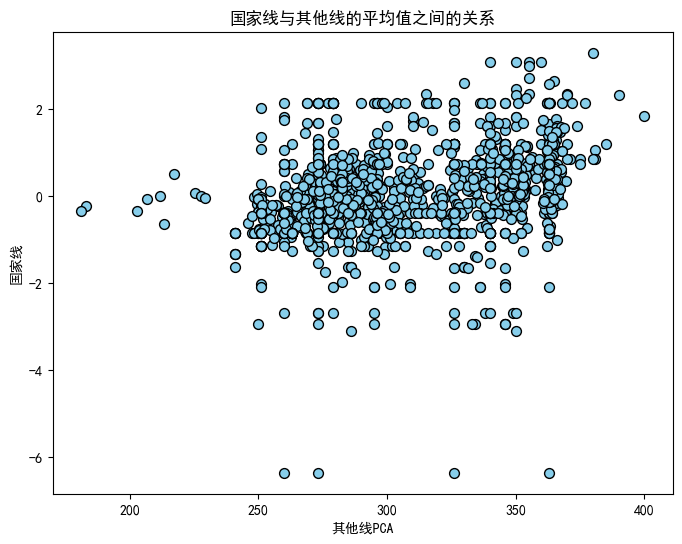

In [297]:
import matplotlib.pyplot as plt

# 按专业计算 '国家线' 和其他四个线（'英语线', '政治线', '数学线', '专业线'）的平均值
avg_scores = data.groupby('专业')[['国家线','PCA']].mean()

# 获取其他四个线的平均值列
x = avg_scores['国家线']  # 每个专业的国家线
y = avg_scores['PCA']  # 每个专业的四个线的平均值

# 绘制二维散点图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='skyblue', edgecolor='black', s=50)  # s=50 为点的大小
plt.title('国家线与其他线的平均值之间的关系')
plt.xlabel('其他线PCA')
plt.ylabel('国家线')

# 显示图形
plt.show()


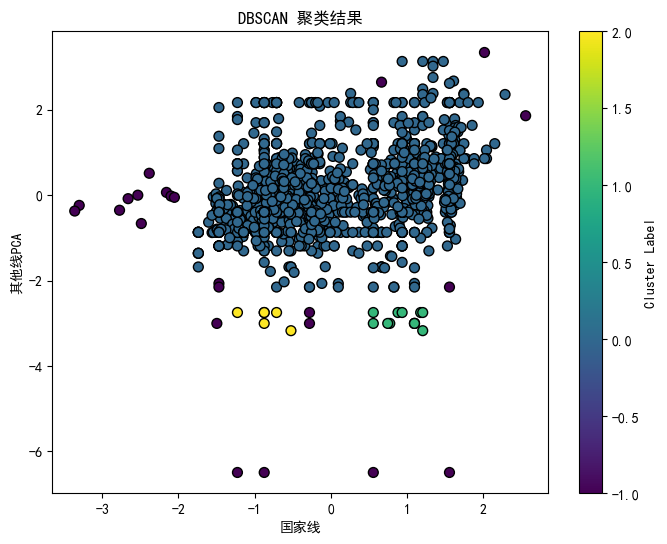

不同标签: [-1  0  1  2]
类别 -1: 23 points
类别 0: 1519 points
类别 1: 12 points
类别 2: 6 points


In [304]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 按专业计算 '国家线' 和其他四个线（'英语线', '政治线', '数学线', '专业线'）的平均值
avg_scores = data.groupby('专业')[['国家线', 'PCA']].mean()

# 获取国家线和其他四个线的平均值
x = avg_scores['国家线'].values.reshape(-1, 1)  # 国家线
y = avg_scores['PCA'].values.reshape(-1, 1)  # 四个线的平均值

# 合并 x 和 y 为一个新的特征矩阵
X = np.hstack((x, y))  # 将国家线和其他四个线的平均值合并为一个二维数组

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 DBSCAN 进行聚类
dbscan = DBSCAN(eps=0.4, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN 聚类结果')
plt.xlabel('国家线')
plt.ylabel('其他线PCA')
plt.colorbar(label='Cluster Label')  # 显示聚类标签
plt.show()

# 查看每个簇的数量
unique_labels = np.unique(labels)
print(f"不同标签: {unique_labels}")
for label in unique_labels:
    print(f"类别 {label}: {np.sum(labels == label)} points")


排除噪声点后的x（国家线）:
[-0.68432316 -1.09659994  0.82961124 ... -0.44777091  1.16996921
 -0.13372856]
排除噪声点后的y（PCA）:
[ 0.17122797  0.40699333 -2.15024756 ... -0.61532953  0.30620816
 -0.4354382 ]

KMeans 聚类结果标签: [0 0 3 ... 1 3 1]


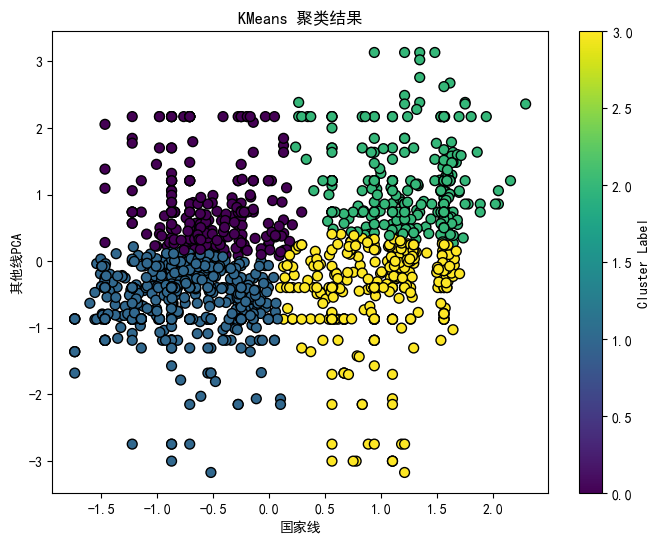


KMeans聚类不同标签: [0 1 2 3]
类别 0: 249 points
类别 1: 666 points
类别 2: 298 points
类别 3: 324 points


In [314]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

# 按专业计算 '国家线' 和 'PCA' 的平均值
avg_scores = data.groupby('专业')[['国家线', 'PCA']].mean()

# 获取国家线和PCA的平均值
x = avg_scores['国家线'].values.reshape(-1, 1)  # 国家线
y = avg_scores['PCA'].values.reshape(-1, 1)  # PCA

# 合并 x 和 y 为一个新的特征矩阵
X = np.hstack((x, y))  # 将国家线和其他四个线的平均值合并为一个二维数组

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 DBSCAN 进行聚类
dbscan = DBSCAN(eps=0.4, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 排除噪声点（即标签为-1的点）
X_filtered = X_scaled[labels != -1]
labels_filtered = labels[labels != -1]

# 提取排除噪声点后的x和y
x_filtered = X_filtered[:, 0]
y_filtered = X_filtered[:, 1]

# 输出排除噪声点后的x（国家线）和y（PCA）
print("排除噪声点后的x（国家线）:")
print(x_filtered)

print("排除噪声点后的y（PCA）:")
print(y_filtered)

# KMeans 聚类
kmeans = KMeans(n_clusters=4, random_state=42)  # 设置3个簇
kmeans_labels = kmeans.fit_predict(X_filtered)

# 输出KMeans的聚类标签
print(f"\nKMeans 聚类结果标签: {kmeans_labels}")

# 可视化 KMeans 聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered, c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('KMeans 聚类结果')
plt.xlabel('国家线')
plt.ylabel('其他线PCA')
plt.colorbar(label='Cluster Label')  # 显示聚类标签
plt.show()

# 查看每个簇的数量
unique_kmeans_labels = np.unique(kmeans_labels)
print(f"\nKMeans聚类不同标签: {unique_kmeans_labels}")
for label in unique_kmeans_labels:
    print(f"类别 {label}: {np.sum(kmeans_labels == label)} points")
